# [CDAF] Atividade 1

## Nome e matrícula
Nome: Bernardo Vale dos Santos Bento

Matrícula: 2023002065

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre aleatoriedade e previsão a partir dos dados de
súmula.


Para isso utilizaremos o dataset "Soccer Prediction Challenge", disponível no Moodle.

# **Bilbiotecas**

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

arquivo = "TrainingSet_2023_02_08.xlsx"
bruto = pd.read_excel(arquivo)
df = bruto[(bruto["HS"] >= 0) & (bruto["AS"] >= 0)]

# **Questão 1**
- Carregue o dataset 'TrainingSet_2023_02_08'
- Crie 4 histogramas:
    a) um para a quantidade de gols marcados por jogo pelos times mandantes
    b) um para a quantidade de gols marcados por jogo pelos time visitantes
    c) um para a quantidade total de gols em cada partida
    d) um para a diferença de gols por partida
- Caso hajam jogos com erros claros de anotação, destaque-os e remova-os antes de gerar os histogramas.
- Calcule o mínimo, o máximo e a média dos valores representados em cada um dos 4 histogramas.

<ipython-input-2-c552128b1cee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "somaPlacar"] = df["HS"] + df["AS"]


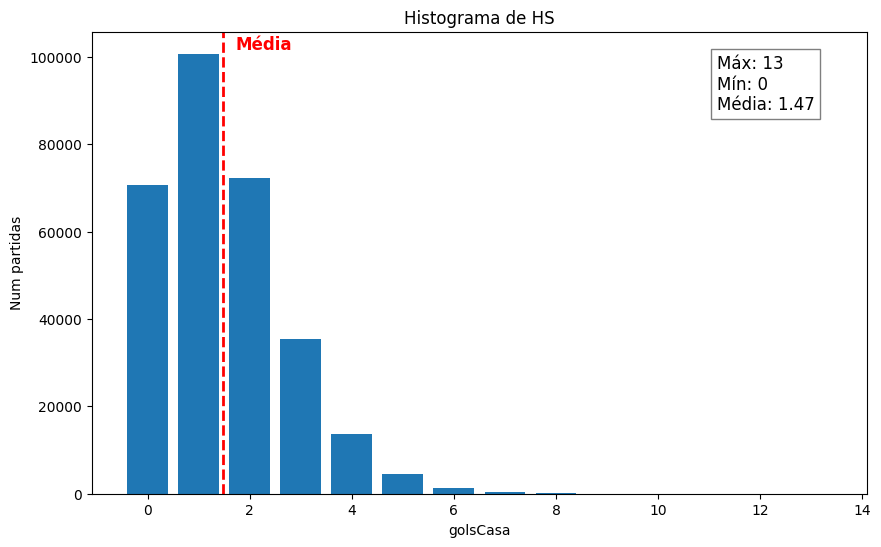

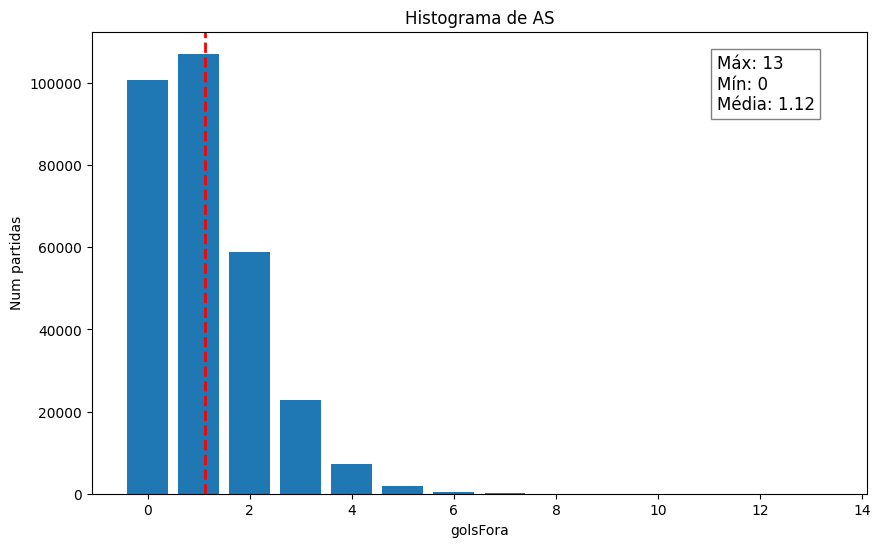

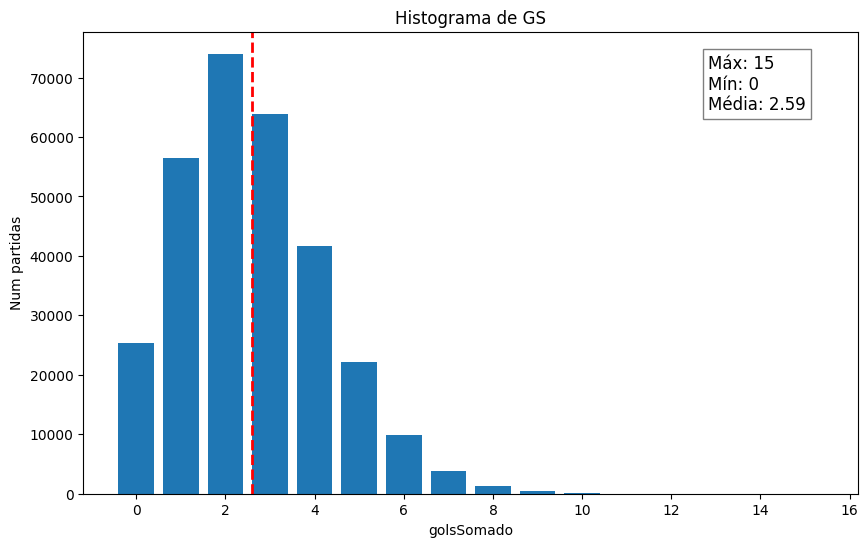

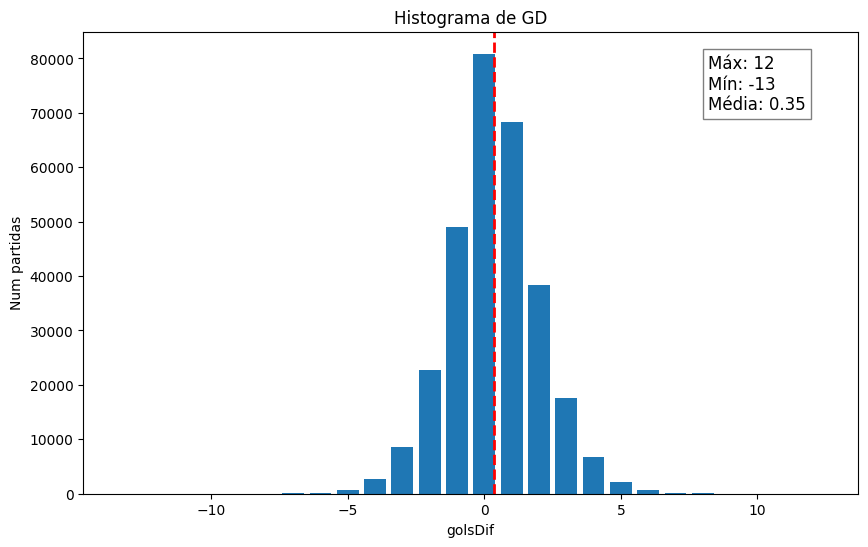

In [2]:
def histograma(df):

  golsCasa = df["HS"].value_counts()
  golsFora = df["AS"].value_counts()
  df.loc[:, "somaPlacar"] = df["HS"] + df["AS"]
  golsSomado = df["somaPlacar"].value_counts()
  golsDif = df["GD"].value_counts()

# grafico de golsCasa

  somaGols = np.sum(golsCasa.index * golsCasa.values)
  partidas = golsCasa.values.sum()
  media = somaGols / partidas

  max = golsCasa.index.max()
  min = golsCasa.index.min()

  plt.figure(figsize=(10, 6))
  plt.bar(golsCasa.index, golsCasa.values)
  plt.axvline(media, color="red", linestyle="dashed", linewidth=2, label=f"Média Gols por Partida ({media:.2f})")

  plt.text(media + 0.25, golsCasa.max() - 10, "Média",
          color="red", fontsize=12, verticalalignment="bottom", fontweight="bold")

  plt.xlabel("golsCasa")
  plt.ylabel("Num partidas")
  plt.title("Histograma de HS")

  texto = f"Máx: {max}\nMín: {min}\nMédia: {media:.2f}"
  plt.gcf().text(0.75, 0.75, texto, fontsize=12, bbox=dict(facecolor="white", alpha=0.5))

  plt.show()

  #grafico golsFora

  somaGols = np.sum(golsFora.index * golsFora.values)
  partidas = golsFora.values.sum()
  media = somaGols / partidas

  max = golsFora.index.max()
  min = golsFora.index.min()

  plt.figure(figsize=(10, 6))
  plt.bar(golsFora.index, golsFora.values)
  plt.axvline(media, color="red", linestyle="dashed", linewidth=2, label=f"Média Gols por Partida ({media:.2f})")

  plt.xlabel("golsFora")
  plt.ylabel("Num partidas")
  plt.title("Histograma de AS")

  texto = f"Máx: {max}\nMín: {min}\nMédia: {media:.2f}"
  plt.gcf().text(0.75, 0.75, texto, fontsize=12, bbox=dict(facecolor="white", alpha=0.5))

  plt.show()

  #grafico golsSomado

  somaGols = np.sum(golsSomado.index * golsSomado.values)
  partidas = golsSomado.values.sum()
  media = somaGols / partidas

  max = golsSomado.index.max()
  min = golsSomado.index.min()

  plt.figure(figsize=(10, 6))
  plt.bar(golsSomado.index, golsSomado.values)
  plt.axvline(media, color="red", linestyle="dashed", linewidth=2, label=f"Média Gols por Partida ({media:.2f})")

  plt.xlabel("golsSomado")
  plt.ylabel("Num partidas")
  plt.title("Histograma de GS")

  texto = f"Máx: {max}\nMín: {min}\nMédia: {media:.2f}"
  plt.gcf().text(0.75, 0.75, texto, fontsize=12, bbox=dict(facecolor="white", alpha=0.5))

  plt.show()

  #grafico golsDif

  somaGols = np.sum(golsDif.index * golsDif.values)
  partidas = golsDif.values.sum()
  media = somaGols / partidas

  max = golsDif.index.max()
  min = golsDif.index.min()

  plt.figure(figsize=(10, 6))
  plt.bar(golsDif.index, golsDif.values)
  plt.axvline(media, color="red", linestyle="dashed", linewidth=2, label=f"Média Gols por Partida ({media:.2f})")

  plt.xlabel("golsDif")
  plt.ylabel("Num partidas")
  plt.title("Histograma de GD")

  texto = f"Máx: {max}\nMín: {min}\nMédia: {media:.2f}"
  plt.gcf().text(0.75, 0.75, texto, fontsize=12, bbox=dict(facecolor="white", alpha=0.5))

  plt.show()

histograma(df)

## Questão 2
- Escolha uma temporada já finalizada de alguma das ligas presentes no dataset.
- Repita os 4 histogramas da questão 1 utilizando apenas dados do campeonato selecionado.
- Quais as diferenças entre os histogramas da questão 1 e da questão 2? O que isso pode indicar sobre as características da liga escolhida quando comparada ao todo?

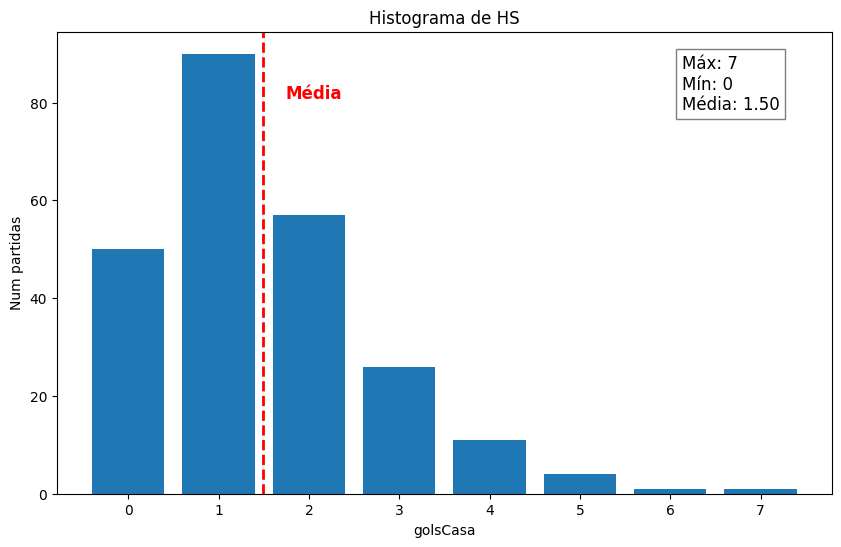

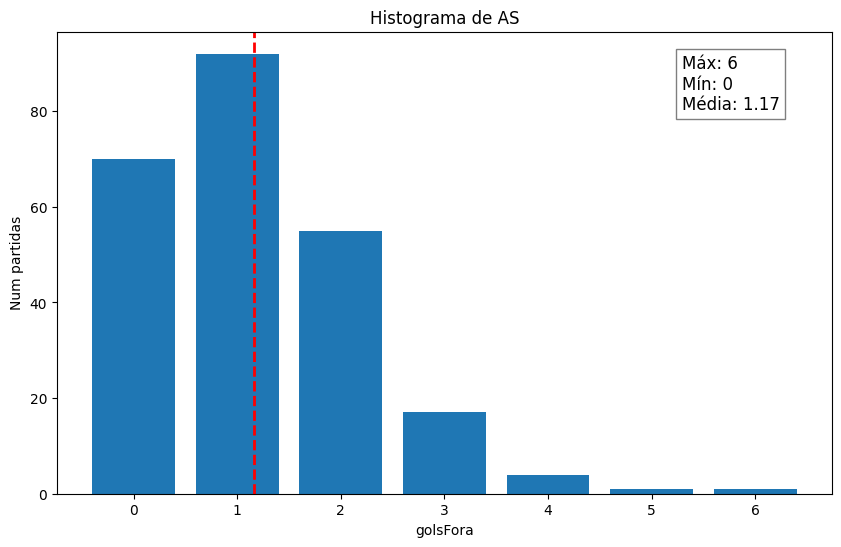

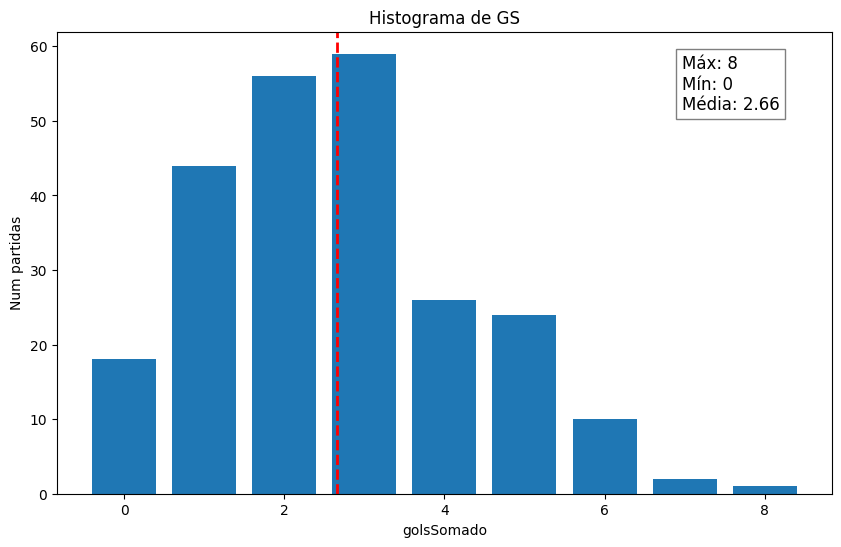

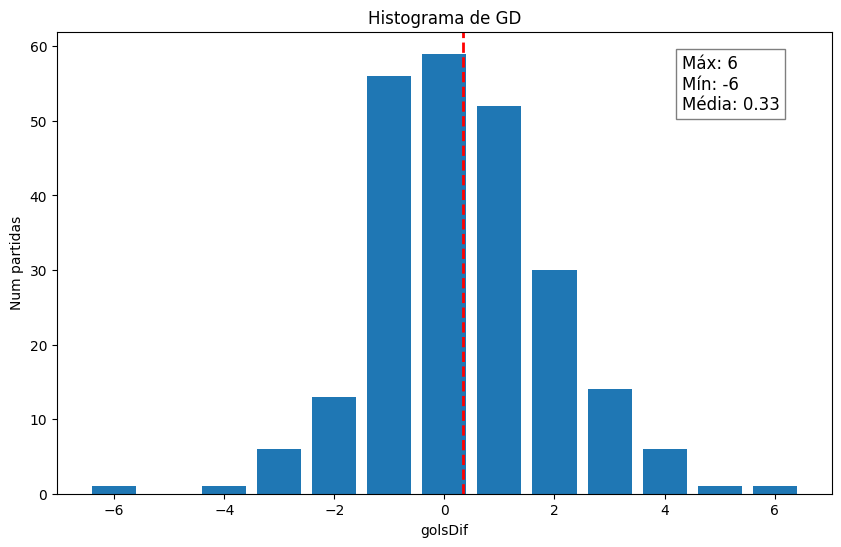

In [3]:
russo = df[(df["Lge"] == "RUS1") & (df["Sea"] == "21-22")]
histograma(russo)

# O campeonato russo tem dados bem próximos da média, porém contém um pequeno aumento no número de gols médio, tanto para times da casa como de fora, e uma menor diferença no número de gols.
# Isto pode indicar um maior equilíbrio entre os times russos e uma postura nacional mais agressiva

## Questão 3
- Utilizando apenas dados do campeonato selecionado, crie um dataframe que corresponda à tabela de classificação ao fim da temporada contendo o nome dos times, nº de pontos, jogos, vitórias, empates, derrotas, gols pró, gols contra e saldo de gols. Ordene a classificação por pontos, vitórias, saldo de gols e gols pró.
- Faça o mesmo considerando apenas a primeira metade de jogos.

In [4]:
tabela = {}
i = 0

# Percorrer o excel
for _, row in russo.iterrows():
    ht, at = row["HT"], row["AT"]
    hs, aS, gd = row["HS"], row["AS"], row["GD"]
    wdl = row["WDL"]

    # time mandante (HT)
    if ht not in tabela:
        tabela[ht] = {"Gols Pró": 0, "Gols Contra": 0, "Saldo de Gols": 0, "Pontos": 0}

    tabela[ht]["Gols Pró"] += hs
    tabela[ht]["Gols Contra"] += aS
    tabela[ht]["Saldo de Gols"] += gd

    if wdl == "W":
        tabela[ht]["Pontos"] += 3
    elif wdl == "D":
        tabela[ht]["Pontos"] += 1

    # time visitante (AT)
    if at not in tabela:
        tabela[at] = {"Gols Pró": 0, "Gols Contra": 0, "Saldo de Gols": 0, "Pontos": 0}

    tabela[at]["Gols Pró"] += aS
    tabela[at]["Gols Contra"] += hs
    tabela[at]["Saldo de Gols"] -= gd  # GD negativo para o time visitante

    if wdl == "L":
        tabela[at]["Pontos"] += 3
    elif wdl == "D":
        tabela[at]["Pontos"] += 1

    # primeira metade
    i += 1
    if i == len(russo)/2:
      df_tabela = pd.DataFrame.from_dict(tabela, orient="index").sort_values(by = ["Pontos", "Saldo de Gols", "Gols Pró", "Gols Contra"], ascending=[False, False, False, True])
      print("Primeira metade")
      print(df_tabela)

# campeonato completo

print("\nCampeonato completo")
df_tabela = pd.DataFrame.from_dict(tabela, orient="index").sort_values(by = ["Pontos", "Saldo de Gols", "Gols Pró", "Gols Contra"], ascending=[False, False, False, True])
print(df_tabela)

Primeira metade
                     Gols Pró  Gols Contra  Saldo de Gols  Pontos
Zenit St Petersburg        39           17             22      33
Dinamo Moscow              27           17             10      29
Sochi                      25           18              7      27
Lokomotiv Moscow           21           15              6      25
FK Krasnodar               24           14             10      24
CSKA Moscow                18           14              4      24
Krylia Sovetov             20           17              3      23
Rubin Kazan                20           20              0      22
Terek Grozny               17           21             -4      21
Spartak Moscow             17           21             -4      19
FK Rostov                  27           27              0      17
FC Ufa                     16           21             -5      15
Nizhny Novgorod            16           29            -13      14
FK Khimki                  11           22            -11   

## Questão 4
- Utilizando os jogos da liga escolhida, use regressão de Poisson para criar um modelo de previsão de resultados, como visto nos slides em sala e no Soccermatics.
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson5/plot_SimulateMatches.html
- Dê print no sumário do ajuste
- Simule a partida entre o 1º e o 4º colocado, onde o 1º joga em casa. Primeiro, apresente a quantidade esperada de gols de cada time. Em seguida, apresente um grid com as probabilidades associadas a cada placar possível.

In [5]:
#modelo
modelo_gols = pd.concat([russo[["HT", "AT", "HS"]].assign(home=1).rename(
    columns={"HT": "time", "AT": "oponente", "HS": "gols"}),
    russo[["AT", "HT", "AS"]].assign(home=0).rename(
    columns={"AT": "time", "HT": "oponente", "AS": "gols"})])

poissonModelo = smf.glm(formula="gols ~ home + C(time) + C(oponente)", data=modelo_gols,
                  family=sm.families.Poisson()).fit()
poissonModelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   gols   No. Observations:                  480
Model:                            GLM   Df Residuals:                      448
Model Family:                 Poisson   Df Model:                           31
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -662.89
Date:                Mon, 24 Mar 2025   Deviance:                       462.88
Time:                        00:28:49   Pearson chi2:                     396.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1579
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.2756      0.233      1.185      0.236      -0.180       0.731
C(time)[T.CSKA Moscow]                 0.2876      0.240      1.200      0.230      -0.182       0.757
C(time)[T.Dinamo Moscow]               0.5416      0.229      2.364      0.018       0.092       0.991
C(time)[T.FC Ufa]                     -0.0659      0.261     -0.252      0.801      -0.577       0.446
C(time)[T.FK Khimki]                   0.1054      0.251      0.420      0.675      -0.387       0.598
C(time)[T.FK Krasnodar]                0.2892      0.240      1.207      0.227      -0.180       0.759
C(time)[T.FK Rostov]                   0.4379      0.234      1.868      0.062      -0.021       0.897
C(time)[T.FK Ural]                    -0.1457      0.266     -0.548      0.584      -0.667       0.375
C(time)[T.Krylia Sovetov]              0.2248      0.243      0.924      0.356      -0.252       0.702
C(time)[T.Lokomotiv Moscow]            0.3279      0.238      1.375      0.169      -0.140       0.795
C(time)[T.Nizhny Novgorod]            -0.1770      0.268     -0.659      0.510      -0.703       0.349
C(time)[T.Rubin Kazan]                 0.1207      0.251      0.481      0.631      -0.372       0.613
C(time)[T.Sochi]                       0.5416      0.228      2.372      0.018       0.094       0.989
C(time)[T.Spartak Moscow]              0.1803      0.246      0.732      0.464      -0.302       0.663
C(time)[T.Terek Grozny]                0.1478      0.248      0.596      0.551      -0.338       0.633
C(time)[T.Zenit St Petersburg]         0.7398      0.221      3.351      0.001       0.307       1.173
C(oponente)[T.CSKA Moscow]            -0.6931      0.227     -3.050      0.002      -1.138      -0.248
C(oponente)[T.Dinamo Moscow]          -0.3267      0.204     -1.602      0.109      -0.726       0.073
C(oponente)[T.FC Ufa]                 -0.3919      0.205     -1.910      0.056      -0.794       0.010
C(oponente)[T.FK Khimki]              -0.2217      0.196     -1.131      0.258      -0.606       0.162
C(oponente)[T.FK Krasnodar]           -0.6591      0.225     -2.933      0.003      -1.099      -0.219
C(oponente)[T.FK Rostov]              -0.1173      0.192     -0.612      0.541      -0.493       0.259
C(oponente)[T.FK Ural]                -0.5291      0.214     -2.475      0.013      -0.948      -0.110
C(oponente)[T.Krylia Sovetov]         -0.4811      0.212     -2.270      0.023      -0.896      -0.066
C(oponente)[T.Lokomotiv Moscow]       -0.3940      0.207     -1.905      0.057      -0.799       0.011
C(oponente)[T.Nizhny Novgorod]        -0.4222      0.207     -2.042      0.041      -0.827      -0.017
C(oponente)[T.Rubin Kazan]            -0.0456      0.187     -0.244      0.807      -0.412      

In [6]:
def simula_partida(modelo, timeCasa, timeFora):
    gols_casa_esperado = modelo.predict(pd.DataFrame(data={
        "home": 1,
        "time": [timeCasa],
        "oponente": [timeFora]},
        index = [1]
    )).values[0]

    gols_fora_esperado = modelo.predict(pd.DataFrame(data={
        "home": 0,
        "time": [timeFora],
        "oponente": [timeCasa]},
        index = [1]
    )).values[0]

    return gols_casa_esperado, gols_fora_esperado

In [7]:
# simula partida
timeCasa = df_tabela.iloc[0].name
timeFora = df_tabela.iloc[3].name

prob_golsCasa, prob_golsFora = simula_partida(poissonModelo, timeCasa, timeFora)

golsCasa = np.random.poisson(prob_golsCasa)
golsFora = np.random.poisson(prob_golsFora)

print(timeCasa+":", golsCasa, f"(probabilade: {prob_golsCasa})")
print(timeFora+":", golsFora, f"(probabilade: {prob_golsFora})")

Zenit St Petersburg: 1 (probabilade: 1.7696989632568847)
CSKA Moscow: 0 (probabilade: 0.8827329108652563)


In [8]:
def simula_partida_grid(modelo, timeCasa, timeFora, golsMax):

  golsCasa_medio, golsFora_medio = simula_partida(modelo, timeCasa, timeFora)

  pred = [[poisson.pmf(i, mediaTime) for i in range(0, golsMax + 1)] for mediaTime in
              [golsCasa_medio, golsFora_medio]]
  return (np.outer(np.array(pred[0]), np.array(pred[1])))

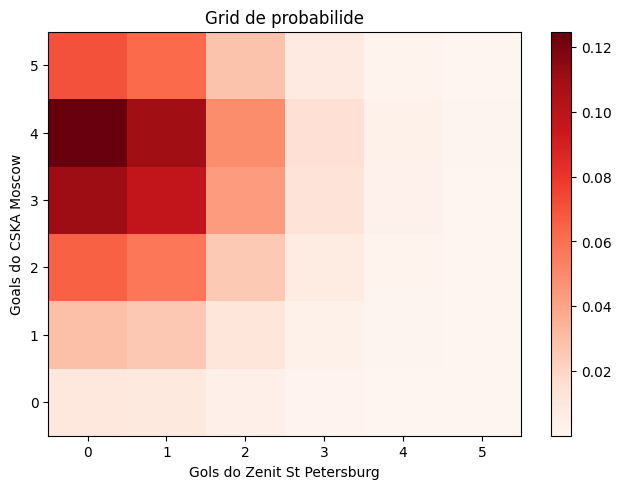

In [9]:
golsMax = 5
matriz_resultados = simula_partida_grid(poissonModelo, timeCasa, timeFora, golsMax)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
pos=ax.imshow(matriz_resultados, extent=[-0.5,golsMax+0.5,-0.5,golsMax+0.5],
              aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Grid de probabilide')
plt.xlim((-0.5,5.5))
plt.ylim((-0.5,5.5))
plt.tight_layout()
ax.set_xlabel('Gols do ' + timeCasa)
ax.set_ylabel('Goals do ' + timeFora)
plt.show()

homewin=np.sum(np.tril(matriz_resultados, -1))
draw=np.sum(np.diag(matriz_resultados))
awaywin=np.sum(np.triu(matriz_resultados, 1))

## Questão 5
- Utilize o modelo treinado para simular os placares de todos os jogos da temporada.
- Construa uma tabela de classificação em cima dos resultados esperados. Considere que jogos com uma diferença esperada de gols < 0.5 são empates.
- Compare a tabela real com a simulada. Onde estão as principais diferenças entre elas? E similaridades? Como você interpreta essa comparação? É possível identificar aspectos que o modelo subestima/superestima? É possível identificar times que tiveram campanhas "sortudas" ou "azaradas"?

In [23]:
tabela = {}

#percorre o excel
for _, row in russo.iterrows():
  timeCasa, timeFora = row["HT"], row["AT"]
  # simula partida
  gols_esperados = simula_partida(poissonModelo, timeCasa, timeFora)

  #abs = modulo
  if abs(gols_esperados[0] - gols_esperados[1]) < 0.5: #empate
    golsCasa = np.random.poisson(gols_esperados[0])
    golsFora = golsCasa
  else:
    golsCasa = np.random.poisson(gols_esperados[0])
    golsFora = np.random.poisson(gols_esperados[1])

  if timeCasa not in tabela:
    tabela[timeCasa] = {"Gols Pró": 0, "Gols Contra": 0, "Saldo de Gols": 0, "Pontos": 0}

  tabela[timeCasa]["Gols Pró"] += golsCasa
  tabela[timeCasa]["Gols Contra"] += golsFora
  tabela[timeCasa]["Saldo de Gols"] += (golsCasa - golsFora)

  if golsCasa > golsFora:
    tabela[timeCasa]["Pontos"] += 3
  elif golsCasa == golsFora:
    tabela[timeCasa]["Pontos"] += 1

  if timeFora not in tabela:
    tabela[timeFora] = {"Gols Pró": 0, "Gols Contra": 0, "Saldo de Gols": 0, "Pontos": 0}

  tabela[timeFora]["Gols Pró"] += golsFora
  tabela[timeFora]["Gols Contra"] += golsCasa
  tabela[timeFora]["Saldo de Gols"] += (golsFora - golsCasa)

  if golsFora > golsCasa:
    tabela[timeFora]["Pontos"] += 3
  elif golsCasa == golsFora:
    tabela[timeFora]["Pontos"] += 1

df_novaTabela = pd.DataFrame.from_dict(tabela, orient="index").sort_values(by = ["Pontos", "Saldo de Gols", "Gols Pró", "Gols Contra"], ascending=[False, False, False, True])
print(df_novaTabela)

                     Gols Pró  Gols Contra  Saldo de Gols  Pontos
Zenit St Petersburg        62           32             30      57
Sochi                      53           37             16      50
CSKA Moscow                42           28             14      45
Terek Grozny               33           23             10      41
Lokomotiv Moscow           46           43              3      41
FC Ufa                     34           33              1      40
Dinamo Moscow              51           55             -4      38
Krylia Sovetov             37           32              5      35
FK Krasnodar               34           37             -3      35
Spartak Moscow             38           42             -4      33
FK Ural                    30           38             -8      31
FK Rostov                  44           48             -4      30
Nizhny Novgorod            31           40             -9      29
Rubin Kazan                39           49            -10      26
Arsenal Tu

# **Análise da Simulação**

Na maioria dos casos as mudanças forma mínimas, porém na simulação onde finalizei o código para análise, foi perceptível uma diminuição geral de pontos e uma maior concentração do saldo de gols ao redor de 0, o que indica uma maior quantidade de empates, provavelmente por causa do parâmetro estabelecido pela questão ("Considere que jogos com uma diferença esperada de gols < 0.5 são empates.")

In [24]:
for i, row in df_tabela.iterrows():
  print(i)
  print("Gols Pró:", df_novaTabela.loc[i]["Gols Pró"]/30,"|", df_tabela.loc[i]["Gols Pró"]/30)
  print("Gols Contra:",df_novaTabela.loc[i]["Gols Contra"]/30,"|", df_tabela.loc[i]["Gols Contra"]/30)
  print("Saldo de Gols:",df_novaTabela.loc[i]["Saldo de Gols"]/30,"|", df_tabela.loc[i]["Saldo de Gols"]/30)
  print("Pontos:",df_novaTabela.loc[i]["Pontos"],"|", df_tabela.loc[i]["Pontos"])
  print("____________________________________________________________")

Zenit St Petersburg
Gols Pró: 2.066666666666667 | 2.2
Gols Contra: 1.0666666666666667 | 0.9333333333333333
Saldo de Gols: 1.0 | 1.2666666666666666
Pontos: 57 | 65
____________________________________________________________
Sochi
Gols Pró: 1.7666666666666666 | 1.8
Gols Contra: 1.2333333333333334 | 1.0
Saldo de Gols: 0.5333333333333333 | 0.8
Pontos: 50 | 56
____________________________________________________________
Dinamo Moscow
Gols Pró: 1.7 | 1.7666666666666666
Gols Contra: 1.8333333333333333 | 1.3666666666666667
Saldo de Gols: -0.13333333333333333 | 0.4
Pontos: 38 | 53
____________________________________________________________
CSKA Moscow
Gols Pró: 1.4 | 1.4
Gols Contra: 0.9333333333333333 | 0.9666666666666667
Saldo de Gols: 0.4666666666666667 | 0.43333333333333335
Pontos: 45 | 50
____________________________________________________________
FK Krasnodar
Gols Pró: 1.1333333333333333 | 1.4
Gols Contra: 1.2333333333333334 | 1.0
Saldo de Gols: -0.1 | 0.4
Pontos: 35 | 50
_____________